# 2) Clustering

## a)

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
colnames=['X1', 'X2', 'X3', 'X4','Class'] 
rawdf = pd.read_csv('Banknote.csv',names=colnames,header=None)
rawdf.head(3)

,X1,X2,X3,X4,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
داده ها را خوانده و نام ستون ها را به انها اضافه می کنیم تا به صورت دیتافریم در آیند.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## b)

### Missing Valuse :

In [3]:
rawdf.isnull().sum()

X1       0
X2       0
X3       0
X4       0
Class    0
dtype: int64

In [4]:
rawdf['Class'].unique()

array([0, 1], dtype=int64)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
همانطور که دیده می شود مقدار null وجود ندارد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### Outliers

In [5]:
print("Before Removing Outliers: ",rawdf.shape)
Q1 = rawdf.loc[:, rawdf.columns != 'Class'].quantile(0.25)
Q3 = rawdf.loc[:, rawdf.columns != 'Class'].quantile(0.75)
IQR = Q3 - Q1 
mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)
print("#Outliers = ",rawdf[~mask].dropna().shape[0])
print("#Not outliers = ",rawdf.shape[0]-rawdf[~mask].dropna().shape[0])

rawdf= rawdf[mask]
print("After Removing Outliers: ",rawdf.shape)
rawdf.head()

Before Removing Outliers:  (1372, 5)
#Outliers =  92
#Not outliers =  1280
After Removing Outliers:  (1280, 5)


<ipython-input-5-def267d5d543>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-5-def267d5d543>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)


,X1,X2,X3,X4,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک روش IQR که بارها قبلا استفاده شده است داده های پرت را حذف می کنیم
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### Normalization:

In [6]:
from sklearn.preprocessing import normalize

In [7]:
numericals = pd.DataFrame(rawdf.loc[:, rawdf.columns != 'Class'])
rawdf.loc[:, rawdf.columns != 'Class'] = normalize(numericals, norm='l2',axis=0)
df=rawdf
df.head(3)

,X1,X2,X3,X4,Class
0,0.036443,0.041923,-0.021284,-0.005747,0
1,0.045743,0.039510,-0.018641,-0.018800,0
2,0.038902,-0.012763,0.014589,0.001369,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
همه داده ها بجز ستون کلاس را نرمال می کنیم.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## c)

In [8]:
from scipy import stats
from sklearn.cluster import KMeans

In [9]:
X = df[['X1','X2','X3','X4']]

In [10]:
kmeans = KMeans(n_clusters=2).fit(X)

In [11]:
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, ..., 0, 1, 1])

## d)

In [12]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.0072889 ,  0.03096275, -0.01226664, -0.03008813],
       [ 0.00741024, -0.00902255,  0.025994  ,  0.00384241]])

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک cluster_centers_ می توان به مراکز دسته دسترسی پیدا کرد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## e)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


In [14]:
center1 = centroids[0][0:3]
center2 = centroids[1][0:3]

In [15]:
LABEL_COLOR_MAP = {0 : '#8282f5',
                   1 : '#ff94f3'
                   }
labels = kmeans.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

Text(0.5, 0, 'X2')

Text(0.5, 0, 'X1')

Text(0.5, 0, 'X3')

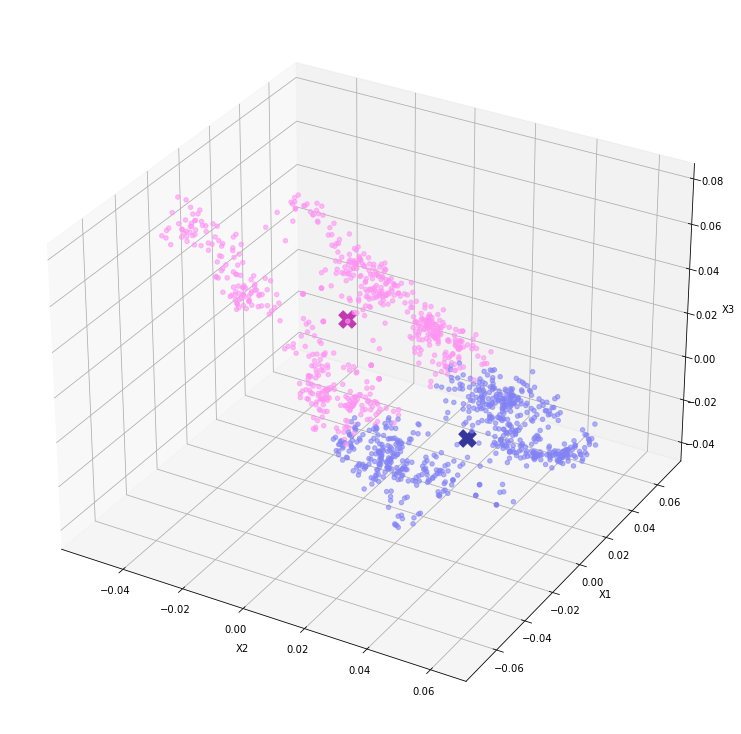

In [36]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(df.X2,df.X1, df.X3, c=label_color,alpha=0.6)

ax.scatter(center1[1],center1[0],center1[2],marker='X',c='#35359c',s=300,alpha=1)
ax.scatter(center2[1],center2[0],center2[2],marker='X',c='#c23ab2',s=300,alpha=1)

ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
plt.show()


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
ابتدا بر اساس سه ستون اول نمودار داده ها را ترسیم کردیم. سپس به کمک سه المان اول مراکزی که به دست می آوریم نماینده های هر کلاستر را هم با X نشان می دهیم.
    رنگی که به هر داده داده می شود متناسب با لیبل آن داده در خوشه بندی است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## f)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
الگوریتمی است که kmeans از ان برای خوشه بندی استفاده می کند.
   الگوریتم معمولی که در مرحله Expectation Maximization را انجام می دهد با نام full شناخته می شود.
    (تعیین مرکز دسته، خوشه بندی، و همینطور ادامه)
    elkan به کمک نامساوی مثلثی به نتیجه بهتری روی داده ها می رسد اما حافظه بیشتری نیاز دارد.
    auto هم elkan را انتخاب می کند.

</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## g)

In [37]:
print('Inertia = ',kmeans.inertia_)

Inertia =  2.146369527822549


## h)

In [31]:
%env OMP_NUM_THREADS=5


env: OMP_NUM_THREADS=5


In [38]:
inertias =[]
for i in range(1,6):
    ikmeans = KMeans(n_clusters=i).fit(X)
    inertias.append(ikmeans.inertia_)

for i in range(0,5):
    print('n_clusters = ',i+1,', inertia_ = ',inertias[i])
    

F:\Anaconda\envs\DM\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


n_clusters =  1 , inertia_ =  3.4948471193902053
n_clusters =  2 , inertia_ =  2.1463695278225496
n_clusters =  3 , inertia_ =  1.6216098341142426
n_clusters =  4 , inertia_ =  1.267966163150855
n_clusters =  5 , inertia_ =  1.0147791552909182


## i)

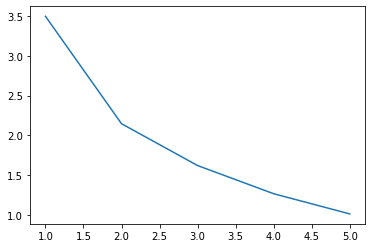

In [39]:
plt.plot(range(1,6),inertias)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
در نقطه 2 بیشترین تغییر ایجاد می شود (elbow) و بعد آن دیگر تغییر خیلی محسوس نیست پس این تعداد مناسبی برای کلاستر است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## j)

In [40]:
from sklearn.metrics import silhouette_score

n_clusters =  2 , silhouette_score =  0.3342712627549094
n_clusters =  3 , silhouette_score =  0.3024165880587485
n_clusters =  4 , silhouette_score =  0.31586184657848576
n_clusters =  5 , silhouette_score =  0.33729017344653067


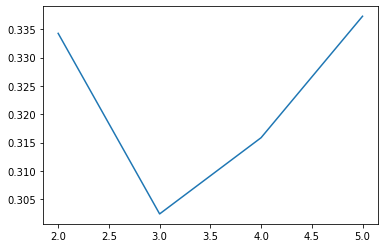

In [44]:
silhouettes = []


# silhouette_score for 1 label leads to error because it needs more than 1 label so I startes from 2
for i in range(2, 6):
    skmeans = KMeans(n_clusters = i).fit(X)
    score=silhouette_score(X, skmeans.labels_)
    silhouettes.append(score)


for i in range(0,4):
    print('n_clusters = ',i+2,', silhouette_score = ',silhouettes[i])

plt.plot(range(2,6),silhouettes)

n_clusters =  2 , silhouette_score =  0.33434849222888924
n_clusters =  3 , silhouette_score =  0.3024165880587485
n_clusters =  4 , silhouette_score =  0.31586184657848576
n_clusters =  5 , silhouette_score =  0.33686039542138485
n_clusters =  6 , silhouette_score =  0.3406692918468696
n_clusters =  7 , silhouette_score =  0.331643368864024
n_clusters =  8 , silhouette_score =  0.3254642707376292
n_clusters =  9 , silhouette_score =  0.32686429394886757


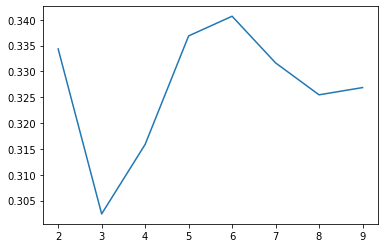

In [45]:
silhouettes = []


# silhouette_score for 1 label leads to error because it needs more than 1 label so I startes from 2
for i in range(2, 10):
    skmeans = KMeans(n_clusters = i).fit(X)
    score=silhouette_score(X, skmeans.labels_)
    silhouettes.append(score)


for i in range(0,8):
    print('n_clusters = ',i+2,', silhouette_score = ',silhouettes[i])

plt.plot(range(2,10),silhouettes)

## k)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
در نقطه 2 بیشترین تغییر ایجاد می شود (elbow) و بعد آن دیگر تغییر خیلی محسوس نیست پس این تعداد مناسبی برای کلاستر است.
  رو روش silhouette اما باید در بازه اعداد ممکن برای متغیر، آن را که به مقدار بیشتری(نزدیکتر به 1) منجر می شود امتخاب کنیم که 5 می تواند باشد(اگر بیشتر بود بازه 6 مناسب بود)
نتیچه این دو روش یکسان نیست.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


Text(0.5, 0, 'X2')

Text(0.5, 0, 'X1')

Text(0.5, 0, 'X3')

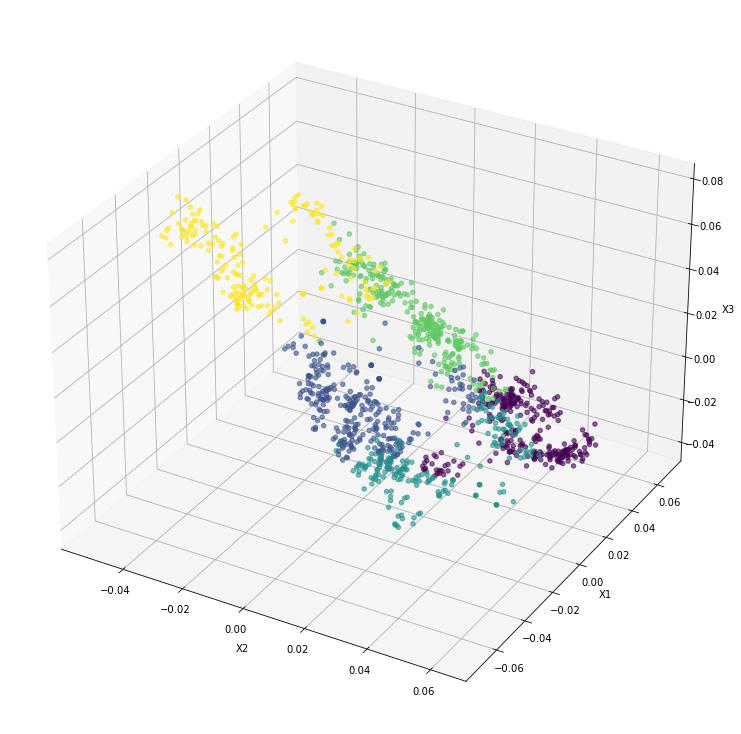

In [46]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

kmeans = KMeans(n_clusters=5).fit(X)

ax.scatter(df.X2,df.X1, df.X3, c=kmeans.labels_,alpha=0.6)


ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
plt.show()
